Token indices sequence length is longer than the specified maximum sequence length for this model (846 > 512). Running this sequence through the model will result in indexing errors
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Original Article: Bears in Siberia are wandering around "half-asleep" following abnormally high temperatures this fall, 
according to the Department for the Protection of Wildlife of the Amur Region.

The bears are ready to hibernate, having accumulated the fat reserves needed to sleep through the winter, 
but warm temperatures in November have kept them up past their bedtime, the government department said in a 
translated Telegram post on Nov. 21.

"In some areas, half-asleep bears still walk around the dens," representatives wrote in the post. Bears were spotted 
traipsing around in a daze a month past the time they usually enter hibernation — toward the end of October, 
according to the post. The sleepless bears were mainly males, while females with cubs took to their dens "strictly on 
schedule," the post said.

Bears normally spend winter asleep in dens, emerging in the spring when food becomes available again. Unlike other 
hibernating animals, bears decide for themselves when t

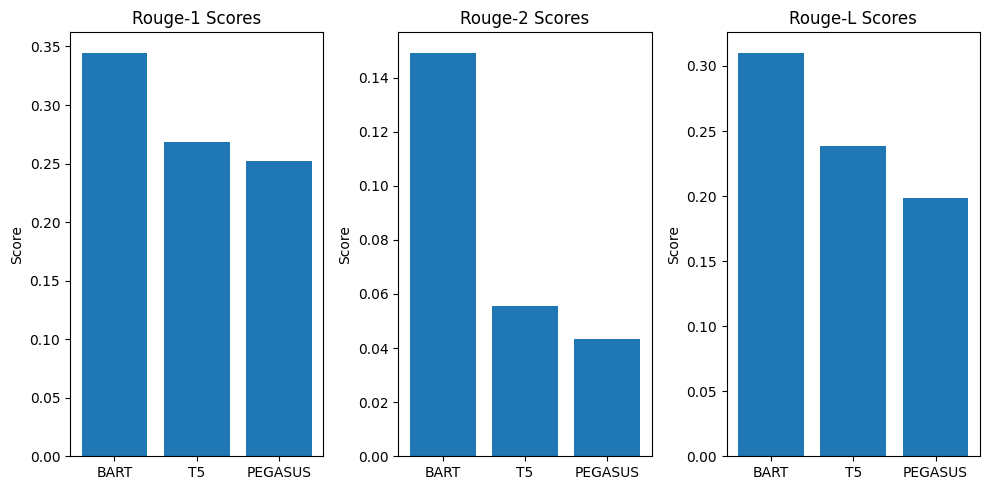

In [2]:
from matplotlib import pyplot as plt
from rouge import Rouge
from transformers import pipeline

# preferred models
BART = 'facebook/bart-large-cnn'
T5 = 'Falconsai/text_summarization'
PEGASUS = 'google/pegasus-large'


# take text content and summarizes it using preferred model
def summarize_text(content, preferred_model='facebook/bart-large-cnn'):
    summarizer = pipeline("summarization", model=preferred_model)
    return summarizer(content, max_length=200, min_length=30, do_sample=False)


# takes a summary and reference summary then it returns rough score for the summary
def score_summary(summary, reference_summary):
    rouge = Rouge()
    rouge_scores = rouge.get_scores(str(summary), str(reference_summary))
    return rouge_scores[0]

# article collected from: https://www.livescience.com/animals/bears/half-asleep-bears-are-wandering-around-siberia-because-its-too-hot-to-hibernate
article = """Bears in Siberia are wandering around "half-asleep" following abnormally high temperatures this fall, 
according to the Department for the Protection of Wildlife of the Amur Region.

The bears are ready to hibernate, having accumulated the fat reserves needed to sleep through the winter, 
but warm temperatures in November have kept them up past their bedtime, the government department said in a 
translated Telegram post on Nov. 21.

"In some areas, half-asleep bears still walk around the dens," representatives wrote in the post. Bears were spotted 
traipsing around in a daze a month past the time they usually enter hibernation — toward the end of October, 
according to the post. The sleepless bears were mainly males, while females with cubs took to their dens "strictly on 
schedule," the post said.

Bears normally spend winter asleep in dens, emerging in the spring when food becomes available again. Unlike other 
hibernating animals, bears decide for themselves when to begin their long seasonal sleep based on a number of cues, 
including food supply and temperature. Research has linked warmer weather and shorter winters to a reduction in the 
time bears spend hibernating, with bears leaving their dens 3.5 days earlier with every rise in temperature of 1.8 
degrees Fahrenheit (1 degree Celsius).

This fall, the Amur region, which shares a border with China in the Russian Far East, experienced abnormally high and 
record-breaking temperatures in October and November, The Moscow Times reported. And this could be delaying the 
bears' hibernation.

Soggy dens could also be to blame, Oivind Toien, a zoophysiologist and research assistant professor at the Institute 
of Arctic Biology at the University of Alaska Fairbanks, told Live Science in an email. "Temperatures above freezing 
in wet snowy conditions could cause melt-water to enter dens [and] that could make it uncomfortable for bears to stay 
in," he said.

Hibernation timing problems appear to impact males more than females and cubs.

"The denning period in females with cubs serves the additional purpose to protect the cubs," Toien said. Bear cubs 
are more susceptible to frigid temperatures than adults due to their smaller size, as their bodies store less energy 
and lose heat more quickly, he said.

Cubs also have a higher base metabolism per unit of body mass than adults during both the summer and hibernation 
months, "so smaller bears might have to be extra careful in not spending extra energy on activity during this 
transition period into hibernation," Toien said.

Large adult bears, however, can maintain daytime activity during the early winter months by elevating their 
metabolism when they are on the move, then slowing it down again when they are resting, Toien said. Bears that are 
wandering around "half-asleep" may have already triggered the physiological transition to a hibernation state, 
and are thus going about their business with a suppressed metabolism, he added.

Bears in Alaska may also be losing sleep due to warm temperatures, Toien said. "Bears walking around in winter is 
well known for instance from coastal areas of Alaska," he said. "Both the size of the bears and the mild climate in 
those coastal areas and continued availability of some food sources might play a role here."

Sleepless bears are especially common in urban areas, where trash cans offer plentiful and accessible food throughout 
the winter, Toien said. Unlike the bears in the Amur region, those that habitually scavenge on human leftovers don't 
typically build up fat reserves in preparation for hibernation, he added."""

# reference summary collected from: https://www.livescience.com/animals/bears/half-asleep-bears-are-wandering-around-siberia-because-its-too-hot-to-hibernate
reference_summary = """Bears that are struggling to hibernate due to abnormally warm weather in Russia's Amur region 
are wandering around in a daze, having suppressed their metabolism in preparation for winter."""

# generate summary using facebook bart large cnn
bart_large_cnn = bart_summarization = summarize_text(article, BART)[0]['summary_text']

# generate summary using t5 Falconsai text summarization
t5_summarization = summarize_text(article, T5)[0]['summary_text']

# generate summary using pegasus large
pegasus_summarization = summarize_text(article, PEGASUS)[0]['summary_text']

# Score summaries
bart_score = score_summary(bart_large_cnn, reference_summary)
t5_score = score_summary(t5_summarization, reference_summary)
pegasus_score = score_summary(pegasus_summarization, reference_summary)

# Compare Rouge-1 scores
rouge1_scores = {
    "BART": bart_score['rouge-1']['f'],
    "T5": t5_score['rouge-1']['f'],
    "PEGASUS": pegasus_score['rouge-1']['f']
}

# print original article
print(f"Original Article: {article}\n\n")

# print reference summary
print(f"Reference Summary: {reference_summary}\n\n")

# print bart summary
print(f"BART Summary: {bart_large_cnn}\n\n")

# print t5 summary
print(f"T5 Summary: {t5_summarization}\n\n")

# print pegasus summary
print(f"Pegasus Summary: {pegasus_summarization}\n\n")

best_rouge1_model = max(rouge1_scores, key=rouge1_scores.get)
print("Best Rouge-1 Score Model:", best_rouge1_model)
print("BART Score:", bart_score['rouge-1']['f'])
print("T5 Score:", t5_score['rouge-1']['f'])
print("PEGASUS Score:", pegasus_score['rouge-1']['f'])
print()

# Compare Rouge-2 scores
rouge2_scores = {
    "BART": bart_score['rouge-2']['f'],
    "T5": t5_score['rouge-2']['f'],
    "PEGASUS": pegasus_score['rouge-2']['f']
}
best_rouge2_model = max(rouge2_scores, key=rouge2_scores.get)
print("Best Rouge-2 Score Model:", best_rouge2_model)
print("BART Score:", bart_score['rouge-2']['f'])
print("T5 Score:", t5_score['rouge-2']['f'])
print("PEGASUS Score:", pegasus_score['rouge-2']['f'])
print()

# Compare Rouge-L scores
rougel_scores = {
    "BART": bart_score['rouge-l']['f'],
    "T5": t5_score['rouge-l']['f'],
    "PEGASUS": pegasus_score['rouge-l']['f']
}
best_rougel_model = max(rougel_scores, key=rougel_scores.get)
print("Best Rouge-L Score Model:", best_rougel_model)
print("BART Score:", bart_score['rouge-l']['f'])
print("T5 Score:", t5_score['rouge-l']['f'])
print("PEGASUS Score:", pegasus_score['rouge-l']['f'])

# Visualization
models = ['BART', 'T5', 'PEGASUS']
rouge1_scores = [rouge1_scores[model] for model in models]
rouge2_scores = [rouge2_scores[model] for model in models]
rougel_scores = [rougel_scores[model] for model in models]

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(models, rouge1_scores)
plt.title('Rouge-1 Scores')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.bar(models, rouge2_scores)
plt.title('Rouge-2 Scores')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.bar(models, rougel_scores)
plt.title('Rouge-L Scores')
plt.ylabel('Score')

plt.tight_layout()
plt.show()